<a href="https://colab.research.google.com/github/reza7angkasa/design-and-algorithm-analysis/blob/main/Ardean%20Reza%20machine%20learning%20preidiksi%20saham%20WSKT.JK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_excel('/content/tugas 2.xlsx')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-09,945,945,810,830,826.016357,43167900
1,2020-03-10,850,900,830,850,845.920349,61497100
2,2020-03-11,855,870,770,770,766.304321,53300800
3,2020-03-12,700,730,645,645,641.904236,75817200
4,2020-03-13,675,675,600,635,631.952271,124500700
...,...,...,...,...,...,...,...
481,2022-03-01,570,590,560,565,565.000000,92596700
482,2022-03-02,565,570,555,560,560.000000,55518100
483,2022-03-04,560,560,545,550,550.000000,79483500
484,2022-03-07,545,545,515,520,520.000000,106533600


In [ ]:
df.shape

(486, 7)

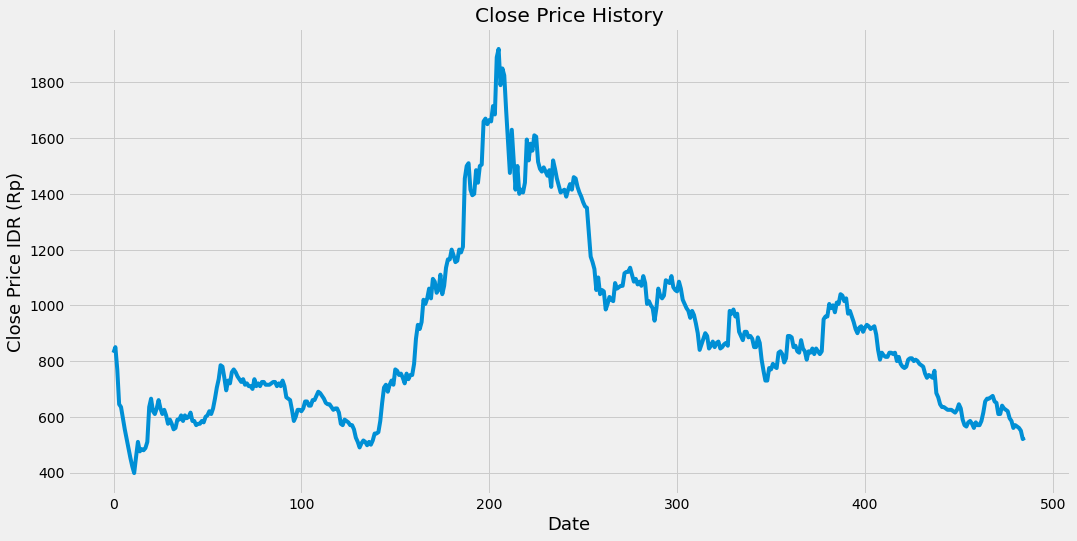

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR (Rp)', fontsize=18)
plt.show()

In [ ]:
data=df.filter(['Close'])
dataset= data.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

389

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.28383706],
       [0.29697766],
       [0.24441524],
       [0.16228647],
       [0.15571616],
       [0.12943495],
       [0.10315375],
       [0.08015769],
       [0.0565046 ],
       [0.03547963],
       [0.01576873],
       [0.        ],
       [0.03810775],
       [0.07358739],
       [0.05124836],
       [0.0565046 ],
       [0.05387648],
       [0.05913272],
       [0.07358739],
       [0.15571616],
       [0.17542707],
       [0.14586071],
       [0.13929041],
       [0.15243101],
       [0.17214192],
       [0.15243101],
       [0.13929041],
       [0.14914586],
       [0.13600526],
       [0.11629435],
       [0.1261498 ],
       [0.11629435],
       [0.10315375],
       [0.1064389 ],
       [0.1261498 ],
       [0.1261498 ],
       [0.13600526],
       [0.12286465],
       [0.13600526],
       [0.12943495],
       [0.13272011],
       [0.14257556],
       [0.12286465],
       [0.12286465],
       [0.1130092 ],
       [0.11629435],
       [0.11629435],
       [0.122

In [ ]:
train_data=scaled_data[0:training_data_len, :]
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.28383706, 0.29697766, 0.24441524, 0.16228647, 0.15571616,
       0.12943495, 0.10315375, 0.08015769, 0.0565046 , 0.03547963,
       0.01576873, 0.        , 0.03810775, 0.07358739, 0.05124836,
       0.0565046 , 0.05387648, 0.05913272, 0.07358739, 0.15571616,
       0.17542707, 0.14586071, 0.13929041, 0.15243101, 0.17214192,
       0.15243101, 0.13929041, 0.14914586, 0.13600526, 0.11629435,
       0.1261498 , 0.11629435, 0.10315375, 0.1064389 , 0.1261498 ,
       0.1261498 , 0.13600526, 0.12286465, 0.13600526, 0.12943495,
       0.13272011, 0.14257556, 0.12286465, 0.12286465, 0.1130092 ,
       0.11629435, 0.11629435, 0.12286465, 0.1195795 , 0.13272011,
       0.13600526, 0.14586071, 0.13929041, 0.15243101, 0.17542707,
       0.20170828, 0.22141919, 0.2542707 , 0.25098555, 0.22470434])]
[0.195137976346912]

[array([0.28383706, 0.29697766, 0.24441524, 0.16228647, 0.15571616,
       0.12943495, 0.10315375, 0.08015769, 0.0565046 , 0.03547963,
       0.01576873, 0.        , 0.0381

In [ ]:
x_train, y_train=np.array(x_train), np.array(y_train)

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(329, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1,epochs=1)

329/329 [==============================] - 12s 28ms/step - loss: 0.0081


In [ ]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

34.03205100777223

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


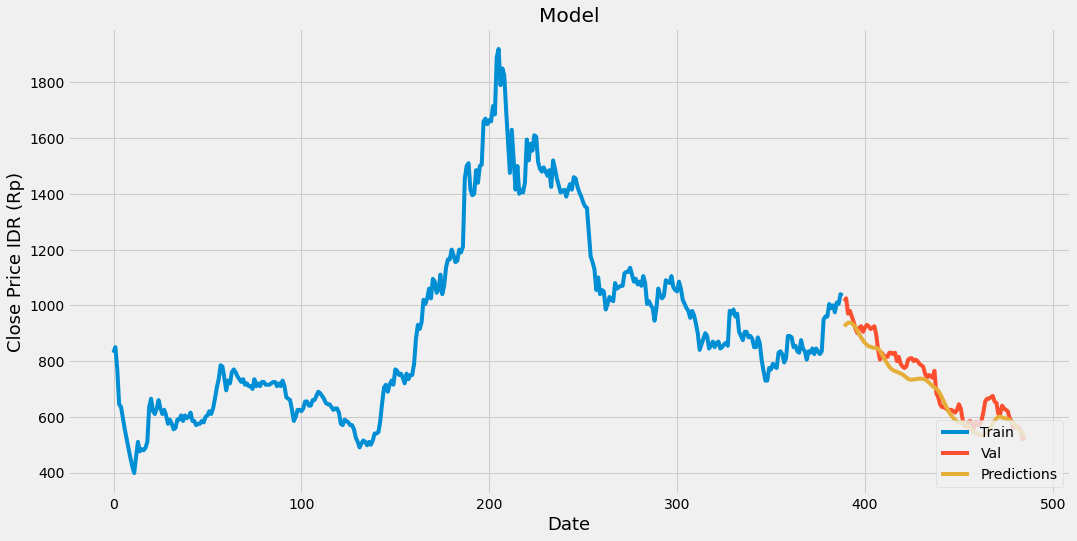

In [ ]:
train = data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']= predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR (Rp)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val','Predictions'], loc='lower right')
plt.show()


In [ ]:
valid

,Close,Predictions
389,1015,924.665833
390,1025,932.087830
391,970,937.874512
392,980,937.754639
393,960,935.023682
...,...,...
481,565,561.056091
482,560,553.024170
483,550,545.469543
484,520,538.066956


In [ ]:
dataset = pd.read_excel('/content/tugas 2.xlsx')
new_df = dataset.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
x_test=[]
x_test.append(last_60_days_scaled)
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))
pred_price=model.predict(x_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[520.39453]]


In [ ]:
dataset2 = pd.read_excel('/content/tugas 2.xlsx')
print(dataset2['Close'])

0      830
1      850
2      770
3      645
4      635
      ... 
481    565
482    560
483    550
484    520
485    525
Name: Close, Length: 486, dtype: int64
